## Computing expected consumption

Assume consumption is given by $C(\epsilon)=(\exp({\epsilon}))$ with $\epsilon$ is a random variable with standard deviation ${\sigma}_{\epsilon}=0.05$.

Set utility of consumption to be: $U(x)=\frac{x^{-\gamma}}{-\gamma}$.

Goal is to compare several ways to compute $E_{\epsilon}(U(C(\epsilon)))$ .

We'll use the calibration $\gamma=40$ and ${\sigma}_{\epsilon}=0.05$. 

__(optional) Compute the result in closed form__

Hint: $$\int_{-\infty}^{\infty}e^{-a x^2+bx +c} dx = \sqrt{\frac{\pi}{a}} e^{\frac{b^2}{4a}+c}$$

__Compute the result by approximating an integral with `QuadGK`__

In [6]:
γ = 40
σ = 0.05
C(e) = exp(e)
U(C) = C^(-γ)/(-γ)
μ(x) = 1/sqrt(2*π*σ^2)*exp(-x^2/(2*σ^2))

μ (generic function with 1 method)

In [52]:
using QuadGK

res_quad, tol = quadgk(e-> U(C(e))*μ(e), -1, 1)

(-0.18472640247326622, 5.760890420659128e-10)

__Compute the result using Monte-Carlo simulations. Evaluate the variance of the estimation.__

In [12]:
using Distributions


In [ ]:
N(0,σ^2)

In [13]:
dis = Normal(0, σ)

Normal{Float64}(μ=0.0, σ=0.05)

In [19]:
E_ϵ(N) = sum(U(C(rand(dis))) for i=1:N)/N

E_ϵ (generic function with 1 method)

In [51]:
@time E_ϵ(1000)

  0.000222 seconds (6.00 k allocations: 93.766 KiB)


-0.226693739078775

In [24]:
using Plots

In [25]:
vals = [E_ϵ(n) for n=1:10000];


10000-element Array{Float64,1}:
 -0.04843686096696258
 -0.03924104809884271
 -0.02437534196369336
 -0.2945848876767495
 -0.2946688067297555
 -0.02794268722402114
 -0.07153192759235225
 -0.0876604907361913
 -0.09973755091816118
 -0.05139052507788668
 -0.052425240833485855
 -0.056288665381980844
 -0.26468377093764817
  ⋮
 -0.17075921646533884
 -0.1918313543619176
 -0.18368940597985564
 -0.1905532584974365
 -0.18708464861484478
 -0.19064823882074264
 -0.18596401276480676
 -0.17660326048394268
 -0.18480514566449502
 -0.2024877522929078
 -0.16918929398719182
 -0.1658198215631647

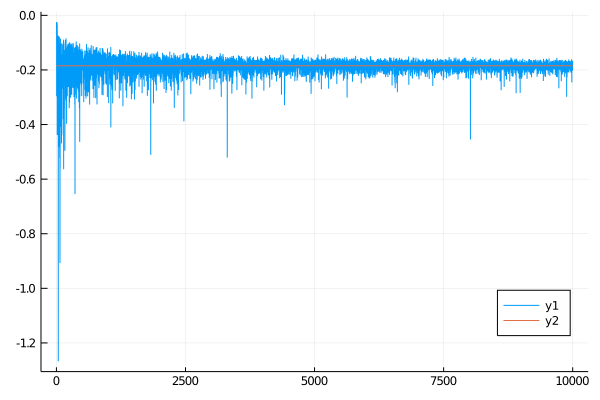

In [29]:
pl = plot(vals, legend=:bottomright)
plot!(pl, vals*0 .+ res_quad )

In [34]:
Nvec=1000:1000:10000
variance_estimator(K) = [std([E_ϵ(n) for k=1:K]) for n=Nvec]

variance_estimator (generic function with 2 methods)

In [36]:
varvec = variance_estimator(1000)

10-element Array{Float64,1}:
 0.03627774282770166
 0.029626142262262543
 0.022657920721038564
 0.022785628947852948
 0.016315653853643034
 0.018243748052367264
 0.01710977361782689
 0.014164911359876742
 0.013206926842024307
 0.012137154782085297

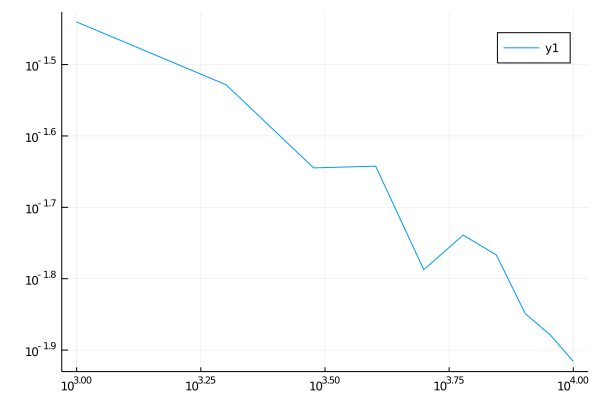

In [41]:
plot(Nvec, varvec, xscale=:log10, yscale=:log10)

__Compute the result using Gauss-Hermite quadrature__

In [43]:
using FastGaussQuadrature



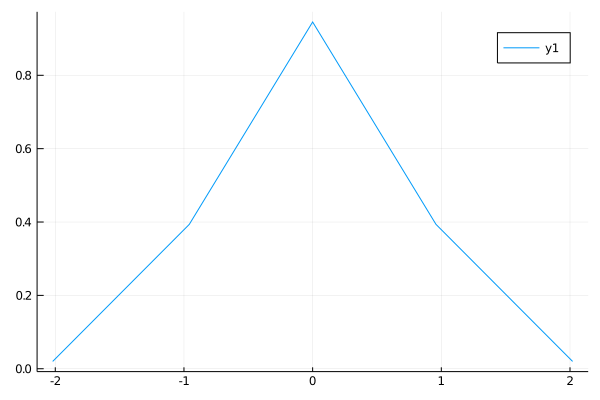

In [61]:
x, w = gausshermite( 5 );
plot(x,w)

In [65]:
x, w = gausshermite( 10 );
x = x.*σ*sqrt(2) # renormalize nodes
s = sum( w_*U(C(x_)) for (w_,x_) in zip(w,x))
s /= sqrt(π) # renormalize output

-0.18472630017716402

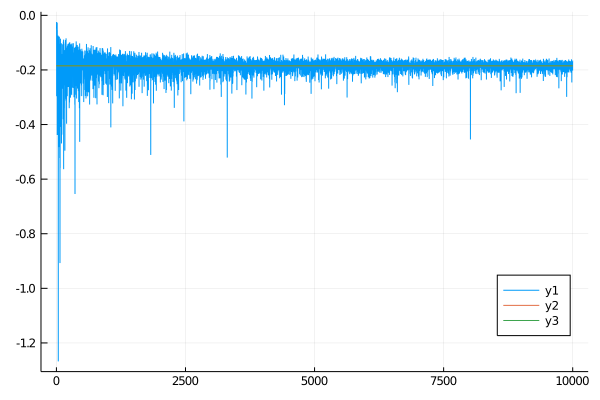

In [57]:
pl = plot(vals, legend=:bottomright)
plot!(pl, vals*0 .+ res_quad )
plot!(pl, vals*0 .+ s)

In [64]:
res_quad-  s

-0.0021850647213921826

## Cournot model

In Cournot competition, and oligopolistic firm equates marginal cost to marginal
revenue: $p + q dp/dq$.

Pricing decision will depend on the demand elasticity: $$dp/dq = 1/D'(p)$$

Our goal is to find the effective supply function $S(p)$.

It satisfies the functional equation:
    
$$p + S(p)/D'(p) - MC(S(p)) = 0$$

Assume 
    
$$D(p) = p^{-\eta}$$
$$MC(q) = \alpha \sqrt{q} + q^2$$

Use the calibration $\alpha=1$, $\eta=1.5$.


__Direct approach:__

- write a routine which solves $S(p)$ for given $p$
- write a routine which solves $S(p)$ for a vector of $p$

__Collocation__

- construct a Chebychev functional space using BasisMatrices, with matching chebychev nodes
- inspect the Basis matrix and plot the various basis polynomials
- solve the above problem with collocation
- plot the result